<a href="https://colab.research.google.com/github/epifyayush/gdg-session3/blob/main/machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv("/diabetes (2).csv")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.shape


(768, 9)

In [ ]:
print("\n missing values \n:" , df.isnull().sum())


 missing values 
: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
x = df.drop(columns = ["Outcome"])  #remove outcome column
y = df["Outcome"] #target column (0 = non diabetic , 1 = diabetic)

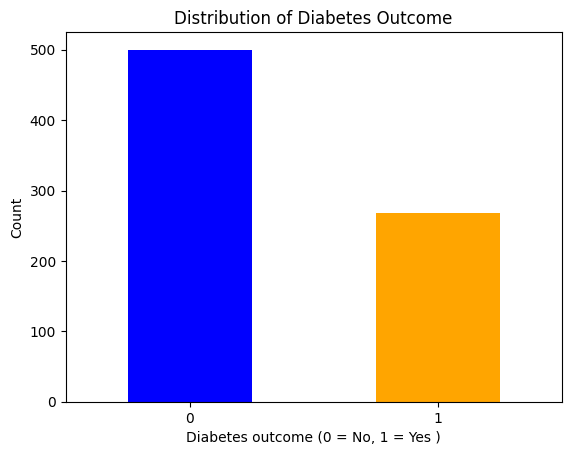

In [ ]:
  counts = df['Outcome'].value_counts()
  counts.plot(kind = 'bar', color =['blue', 'orange'])
  plt.xlabel("Diabetes outcome (0 = No, 1 = Yes )")
  plt.xticks(rotation = 0)
  plt.ylabel("Count")
  plt.title("Distribution of Diabetes Outcome")
  plt.show()

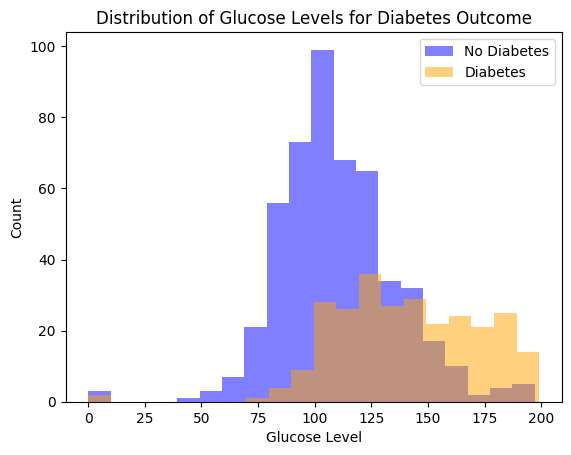

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df[df['Outcome'] == 0]["Glucose"], bins = 20, color = 'blue', alpha = 0.5, label = 'No Diabetes')
plt.hist(df[df['Outcome'] == 1]["Glucose"], bins = 20, color = 'orange', alpha = 0.5, label = 'Diabetes')

plt.xlabel("Glucose Level")
plt.ylabel("Count")
plt.title("Distribution of Glucose Levels for Diabetes Outcome")
plt.legend()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [ ]:
model = SVC(kernel = 'linear', C = 1.0)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 75.97%


In [ ]:
#classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [ ]:
print("confusion matrix:\n", confusion_matrix(y_test, y_pred))

confusion matrix:
 [[81 18]
 [19 36]]


In [ ]:
new_patient = np.array([[2, 250 , 30, 45, 100 , 35.0, 0.5, 55]])
new_patient_scaled = scalar.transform(new_patient)
prediction = model.predict(new_patient_scaled)
print("\nPredicted Diabetes outcome for new patient:", "diabetic"
if prediction[0] == 1
      else
      "not diabetic")


Predicted Diabetes outcome for new patient: diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
